# 2 Discriminative Learning

For the questions in this section, load the wine dataset (wine original.csv). 

Question 1: Perform a 80-20 split using train test split on the data to obtain the train and the test data (random state=3). Use Logistic Regression to classify the wines according to their cultivators. Tune parameters ’penalty’ and ’C’ using GridSearchCV implementation. Report the accuracy on test data. (10 marks)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('wine_original.csv')
labels = data['class']
del data['class']

train_data, test_data, train_label, test_label = train_test_split(data, labels, test_size=0.2, random_state=3)

In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

parameters = { 'penalty': ['l1','l2'], 
              'C':[0.1, 0.5, 1, 2, 3, 4, 5, 10]}
logreg = LogisticRegression()
clf = GridSearchCV(logreg, parameters, verbose=True, n_jobs=-1)
clf.fit(train_data, train_label)
y_pred = clf.predict(test_data)

accuracy = accuracy_score(y_pred, test_label)
train_acc = accuracy_score(clf.predict(train_data), train_label)
print ('Selected Parameters: ', clf.best_params_)
print ('Training Accuracy = ' + str(train_acc))
print ('Test Accuracy = ' + str(accuracy))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Selected Parameters:  {'C': 1, 'penalty': 'l1'}
Training Accuracy = 0.9929577464788732
Test Accuracy = 0.8888888888888888


[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.3s finished


# 3 Perceptron and Support Vector Machines

3.1 Data:
In this section, we will work on the text data. Download the newsgroups data (train and test) using fetch 20newsgroups for categories: ’alt.atheism’, ’comp.graphics’, ’sci.space’ and ’talk.politics.mideast’ after removing ’headers’, ’footers’ and ’quotes’ from the data. Convert all the words in the text to lower case. A common practice is to remove the stopwords like a, and, the etc. from the text. Use nltk to get the stopwords list (nltk.corpus.stopwords) and remove the stopwords from the text. Use TfidfVectorizer to obtain the tfidf vectors (after smoothing*) for the train and test data and select only top 2000 features (words). You can also perform the above stated actions (lowercase and stop- words) using the TfidfVectorizer. Note: You’ll fit the tf-idf vectors on the train data and use the same to transform the test data. (10 marks)
*: Smoothing the text data is same as computing the idf values after adding a document with all words in the vocabulary.

In [5]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

In [6]:
cats = ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.politics.mideast' ]
newsgroups_train = fetch_20newsgroups(subset='train',remove=('headers', 'footers', 'quotes'),categories=cats)
newsgroups_test = fetch_20newsgroups(subset='test',remove=('headers', 'footers', 'quotes'),categories=cats)

In [7]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words=stopwords.words('english'), max_features=2000)
vectors_train = vectorizer.fit_transform(newsgroups_train.data)

In [8]:
vectors_test = vectorizer.transform(newsgroups_test.data)

Question 2: After obtaining the tf-idf vectors for train and test data, use the perceptron model (no penalty) to train on the training vectors and compute the accuracy on the test vectors. (5 marks)

In [9]:
from sklearn.linear_model import Perceptron

In [10]:
# Model
clf = Perceptron()
# fit
clf.fit(vectors_train, newsgroups_train.target)
# predict
pred = clf.predict(vectors_test)
#evaluate
print ('Test accuracy = ' + str(accuracy_score(newsgroups_test.target, pred)))

Test accuracy = 0.7686062246278755


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Question 3: Keeping all the above data processing steps same observe how the test accuracy changes by varying the number of top features selected for 100, 200, 500, 1000, 1500, 2000, 3000 for a perceptron model. Report and plot the results.(10 mark)


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Features selected: 100 Test accuracy = 0.6069012178619756
Features selected: 200 Test accuracy = 0.6732070365358592
Features selected: 500 Test accuracy = 0.7300405953991881
Features selected: 1000 Test accuracy = 0.7422192151556157
Features selected: 1500 Test accuracy = 0.7523680649526387
Features selected: 2000 Test accuracy = 0.7686062246278755
Features selected: 3000 Test accuracy = 0.7807848443843031


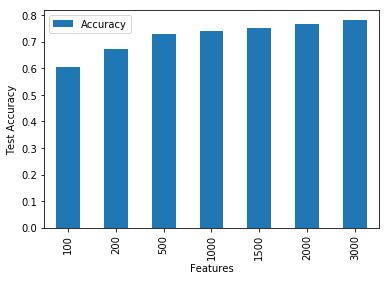

In [11]:
features = [100, 200, 500, 1000, 1500, 2000, 3000]
test_acc = []
for feature in features:
    vectorizer = TfidfVectorizer(lowercase=True, stop_words=stopwords.words('english'), max_features=feature)
    vectors_train = vectorizer.fit_transform(newsgroups_train.data)
    vectors_test = vectorizer.transform(newsgroups_test.data)
    clf = Perceptron()
    clf.fit(vectors_train, newsgroups_train.target)
    pred = clf.predict(vectors_test)
    test_acc.append(accuracy_score(newsgroups_test.target, pred))
    print ('Features selected:',feature,'Test accuracy = ' + str(accuracy_score(newsgroups_test.target, pred)))

bar_plot = pd.DataFrame(test_acc, columns=['Accuracy'], index=features).plot.bar()
xlabel = plt.xlabel('Features')
ylabel = plt.ylabel('Test Accuracy')



Question 4: After obtaining the tf-idf vectors for train and test data, use the SVM model to train on the training vectors and compute the accuracy on the test vectors. Use linear kernel and default parameters. (5 mark)

In [12]:
from sklearn.svm import SVC

In [13]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words=stopwords.words('english'), max_features=2000)
vectors_train = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)
#Model
clf = SVC(kernel='linear')
#fit
clf.fit(vectors_train, newsgroups_train.target)
# predict
pred = clf.predict(vectors_test)
#evaluate
print ('Test accuracy = ' + str(accuracy_score(newsgroups_test.target, pred)))

Test accuracy = 0.7855209742895806


Question 5: Keeping all the above data processing steps same observe how the test accuracy changes by varying the number of top features selected for 100, 200, 500, 1000, 1500, 2000, 3000 for a linear SVM model. Report and plot the results.(10 mark)

Features selected: 100 Test accuracy = 0.652232746955345
Features selected: 200 Test accuracy = 0.6921515561569689
Features selected: 500 Test accuracy = 0.7422192151556157
Features selected: 1000 Test accuracy = 0.7672530446549392
Features selected: 1500 Test accuracy = 0.7767253044654939
Features selected: 2000 Test accuracy = 0.7855209742895806
Features selected: 3000 Test accuracy = 0.8085250338294994


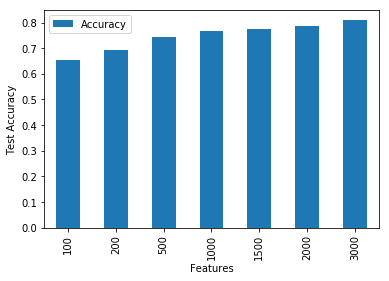

In [14]:
features = [100, 200, 500, 1000, 1500, 2000, 3000]
test_acc = []
for feature in features:
    vectorizer = TfidfVectorizer(lowercase=True, stop_words=stopwords.words('english'), max_features=feature)
    vectors_train = vectorizer.fit_transform(newsgroups_train.data)
    vectors_test = vectorizer.transform(newsgroups_test.data)
    clf = SVC(kernel='linear')
    clf.fit(vectors_train, newsgroups_train.target)
    pred = clf.predict(vectors_test)
    test_acc.append(accuracy_score(newsgroups_test.target, pred))
    print ('Features selected:',feature,'Test accuracy = ' + str(accuracy_score(newsgroups_test.target, pred)))

bar_plot = pd.DataFrame(test_acc, columns=['Accuracy'], index=features).plot.bar()
xlabel = plt.xlabel('Features')
ylabel = plt.ylabel('Test Accuracy')



Question 6: Perform 80-20 split of the training data to obtain validation data using train test split (random state=10). Use this validation data to tune the cost parameter ’C’ for values 0.01,0.1,1,10,100. Select the best value compute the accuracy for the test data. Report the validation and test accuracies. Note: Use full data of 2000 vectors here. (10 marks)

In [15]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words=stopwords.words('english'), max_features=2000)
vectors_train = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)

train_data, val_data, train_label, val_label = train_test_split(vectors_train, newsgroups_train.target, test_size=0.2, random_state=10)

In [16]:
C = [0.01,0.1,1,10,100]
for c in C:
    clf = SVC(kernel='linear', C=c)
    clf.fit(train_data, train_label)
    pred = clf.predict(val_data)
    print ('For C = ',c,'  Validation accuracy = ' + str(accuracy_score(val_label, pred)))


For C =  0.01   Validation accuracy = 0.2449438202247191
For C =  0.1   Validation accuracy = 0.7573033707865169
For C =  1   Validation accuracy = 0.8449438202247191
For C =  10   Validation accuracy = 0.8224719101123595
For C =  100   Validation accuracy = 0.8


From the above values, best C=1 is chosen

In [17]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words=stopwords.words('english'), max_features=2000)
vectors_train = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)
clf = SVC(kernel='linear', C=1)
clf.fit(vectors_train, newsgroups_train.target)
pred = clf.predict(vectors_test)
test_acc.append(accuracy_score(newsgroups_test.target, pred))
print ('Test accuracy = ' + str(accuracy_score(newsgroups_test.target, pred)))


Test accuracy = 0.7855209742895806


Question 7: Train a kernelized SVM (with ’C’=10000) with kernel values - ’poly’ with degree 1, 2, 3, ’rbf’ and ’sigmoid’, and report the one with best accuracy on validation data. Also report the test accuracy for the selected kernel. (10 marks)

In [18]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words=stopwords.words('english'), max_features=2000)
vectors_train = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)

train_data, val_data, train_label, val_label = train_test_split(vectors_train, newsgroups_train.target, test_size=0.2, random_state=10)

In [19]:
kernel = ['poly', 'rbf', 'sigmoid']
deg = [1,2,3]
for k in kernel:
    if k == 'poly':
        for d in deg:
            svc = SVC(C=10000, kernel=k, degree = d)
            svc.fit(train_data, train_label)
            pred = svc.predict(val_data)
            print ('Kernel:',k,'   Degree = ',d,'      Validation accuracy = ' + str(accuracy_score(val_label, pred)))
    else:
        svc = SVC(C=10000, kernel=k)
        svc.fit(train_data, train_label)
        pred = svc.predict(val_data)
        print ('\nKernel:',k,'      Validation accuracy = ' + str(accuracy_score(val_label, pred)))


Kernel: poly    Degree =  1       Validation accuracy = 0.8224719101123595
Kernel: poly    Degree =  2       Validation accuracy = 0.2449438202247191
Kernel: poly    Degree =  3       Validation accuracy = 0.2449438202247191

Kernel: rbf       Validation accuracy = 0.8224719101123595

Kernel: sigmoid       Validation accuracy = 0.8224719101123595


From the above values best kernel is 'poly' with degree 1

In [20]:
clf = SVC(C=10000, kernel='poly', degree = 1)
clf.fit(vectors_train, newsgroups_train.target)
pred = clf.predict(vectors_test)
test_acc.append(accuracy_score(newsgroups_test.target, pred))
print ('Test accuracy = ' + str(accuracy_score(newsgroups_test.target, pred)))

Test accuracy = 0.7652232746955345


# 3.2 Custom Kernels

Now we introduce the concept of custom kernels in Support Vector Machines. There are good chances that we need some other form of similarity measure for our data, for which we need to pass our own function as kernel to SVM.



Question 8: Use Cosine Similarity and Laplacian Kernel (exp−||x−y||1 ) measures, and report the test accuracies using these kernels with SVM. (15 marks)

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import laplacian_kernel

In [22]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words=stopwords.words('english'), max_features=2000)
vectors_train = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)

In [23]:
def cosine_kernel(X,Y):
    return cosine_similarity(X, Y)

In [24]:
clf = SVC(kernel=cosine_kernel)
clf.fit(vectors_train, newsgroups_train.target)
pred = clf.predict(vectors_test)
print ('Kernel: cosine_similarity')
print ('Test accuracy = ' + str(accuracy_score(newsgroups_test.target, pred)))

Kernel: cosine_similarity
Test accuracy = 0.7855209742895806


In [25]:
def lap_kernel(X,Y):
    return laplacian_kernel(X, Y)

In [26]:
clf = SVC(kernel=lap_kernel)
clf.fit(vectors_train, newsgroups_train.target)
pred = clf.predict(vectors_test)
print ('Kernel: laplacian_kernel')
print ('Test accuracy = ' + str(accuracy_score(newsgroups_test.target, pred)))

Kernel: laplacian_kernel
Test accuracy = 0.2665764546684709



Question 9: Another way to construct a kernel is use a linear combination of 2 kernels. Let K be a kernel represented as:
K(x, y) = αK1(x, y) + (1 − α)K2(x, y) (0 ≤ α ≤ 1)
Why is K a valid kernel? Does your reasoning hold true for other values of α as well? Let K1 be the ’cosine similarity’ and K2 be ’Laplacian Kernel’. Using K as kernel, train a SVM model to tune the value of α (upto one decimal) and report the accuracy on the test data using the selected parameter. (15 marks)

In [27]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words=stopwords.words('english'), max_features=2000)
vectors_train = vectorizer.fit_transform(newsgroups_train.data)
vectors_test = vectorizer.transform(newsgroups_test.data)

train_data, val_data, train_label, val_label = train_test_split(vectors_train, newsgroups_train.target, test_size=0.2, random_state=10)

In [28]:
def kernel_comb_alpha(alpha):
    def kernel_comb(X, Y):
        return alpha*cosine_similarity(X, Y) + (1-alpha)*laplacian_kernel(X, Y)
    return kernel_comb

In [29]:
Alpha = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

print ('Kernel: Combination of cosine_similarity and laplacian_kernel')
for alpha in Alpha:
    clf = SVC(kernel=kernel_comb_alpha(alpha))
    clf.fit(train_data, train_label)
    pred = clf.predict(val_data)
    print ('For alpha = ',alpha,'  Validation accuracy = ' + str(accuracy_score(val_label, pred)))

Kernel: Combination of cosine_similarity and laplacian_kernel
For alpha =  0.0   Validation accuracy = 0.2449438202247191
For alpha =  0.1   Validation accuracy = 0.7640449438202247
For alpha =  0.2   Validation accuracy = 0.8179775280898877
For alpha =  0.3   Validation accuracy = 0.8359550561797753
For alpha =  0.4   Validation accuracy = 0.8382022471910112
For alpha =  0.5   Validation accuracy = 0.8471910112359551
For alpha =  0.6   Validation accuracy = 0.851685393258427
For alpha =  0.7   Validation accuracy = 0.8539325842696629
For alpha =  0.8   Validation accuracy = 0.8449438202247191
For alpha =  0.9   Validation accuracy = 0.8471910112359551
For alpha =  1.0   Validation accuracy = 0.8449438202247191


From the above, best alpha chosen is 0.7

In [30]:
clf = SVC(kernel=kernel_comb_alpha(0.7))
clf.fit(vectors_train, newsgroups_train.target)
pred = clf.predict(vectors_test)
print ('Test accuracy = ' + str(accuracy_score(newsgroups_test.target, pred)))

Test accuracy = 0.793640054127199


Mercer’s condition
A function k : X   X → R is a valid kernel function if it corresponds to some embedding: that is, if there exists Φ defined on X such that
k(x , z) = Φ(x) · Φ(z).

Since cosine_similarity and laplacian_kernel are valid kernels, addtion of the kernels involving only positive 
weights also is a valid kernel.

Linear combination (includes the sum of two kernels as a special case)

A linear combination of kernel functions involving only positive weights, i.e.,

K(x,x′)=∑j=1mαjKj(x,x′),with αj≥0,
is a valid kernel function. 

Proof: By construction, the Gram matrix is given by
K=∑(j=1 to m)αjKj
which implies that
∀a∈ℝn,aTKa=∑(j=1 to m)αjaTKja≥0
due to the positivity of the αj and the validity of the kernels Kj.

Based on above reasoing Alpha and (1-Alpha) should be positive 




